In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [2]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(2,0), (5,1), (6,0), (8,3), (7,2), (8,7), (6,9), (5,8), (2,9), (1,7), (2,4), (4,5), (3,6), (5, 7), (5.5, 3), (2,2), (1,3), (0,1)]
polygon_example_colors = [1, 3, 1, 0, 2, 4, 0, 2, 0, 4, 1, 4, 4, 3, 4, 2, 0, 4]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[2], polygon_example_1[4])]

In [3]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_point(polygon)
    vis.add_polygon(polygon, fill=False, color="blue")
    vis.show()

In [4]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()

In [5]:
def draw_polygon_tri(polygon,tri):

    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()

## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

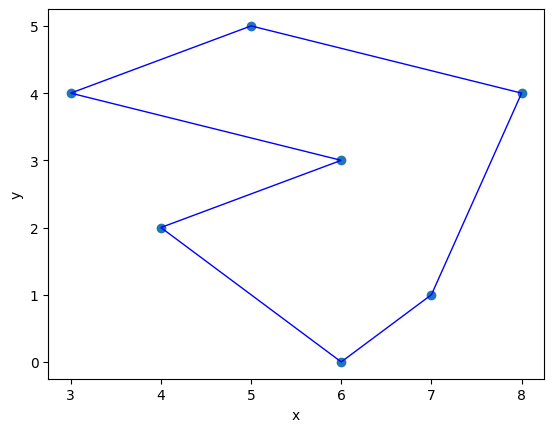

In [ ]:

draw_polygon(polygon_example_1)

Do tego celu wygeneruj wielokąt.

In [4]:

%matplotlib tk

polygon=[]
events=[]
active=True

def draw_point(point):
    """
    Funkcja rysuje punkt o współrzędnych przekazanych w argumencie.
    :param point: punkt reprezentowany przez krotkę współrzędnych x, y odczytanych z kliknięcia myszki
    """
    plt.scatter(point[0],point[1],color="red")
    plt.show()

def draw_line(points):
    """
    Funkcja rysuje odcinek między dwoma wskazanymi punktami wielokąta.
    :param points: tablica punktów (krotek współrzędnych), pomiędzy którymi dodajemy krawędź
    """
    ax=plt.gca()
    x=[points[0][0],points[1][0]]
    y=[points[0][1],points[1][1]]
    line=ax.plot(x,y,color="red") 
    ax.figure.canvas.draw()        

def onclick(event):
    """
    Funkcja obsługuje zdarzenie kliknięcia myszką, dodając punkt wielokąta w kliknięte miejsce,
    a następnie dodając bok / usuwając ostatnio dodany wierzchołek
    :param event: zdarzenie kliknięcia myszką, które przechowuje m. in. informacje 
    o klikniętym punkcie oraz to, który przycisk myszy został kliknięty
    """
    global active
    if event.dblclick and active:
        if event.button==1:
            x=event.xdata
            y=event.ydata
            polygon.append((x,y))
            events.append(event)
            draw_point((x,y))
            if len(polygon)>1:
                draw_line([polygon[-2],polygon[-1]])
        elif event.button==3 and len(polygon)>2:
            draw_line([polygon[-1],polygon[0]])
            active=False
            plt.pause(0.5)
            ax.set_title("Dziękuję! Zamykam w ciągu 2 sekund")
            plt.pause(2)
            plt.close()

fig,ax=plt.subplots()
plt.get_current_fig_manager().set_window_title("Wygeneruj własny wielokąt!")
ax.set_title("Kliknij, aby dodać wierzchołek wielokąta")
connection_id=fig.canvas.mpl_connect("button_press_event",onclick)
ax.set_xlim([0,2])
ax.set_ylim([0,2])
ax.aspect=1
plt.tight_layout()
plt.ion()
plt.show()

In [ ]:
%matplotlib inline
if len(polygon)<3:
    print("Nieprawidłowy wielokąt - wprowadzono mniej niż 3 punkty.")
else:
    draw_polygon(polygon)


Nieprawidłowy wielokąt - wprowadzono mniej niż 3 punkty.


## Wybrane zbiory testujące 

Do przetestowania porprawności napisacych algorytmów i wizualizacji krokowej algorytmu znajdowania triangulacji użyłem poniższych zbiorów

a) Figura zbudowana z punktów na okręgu

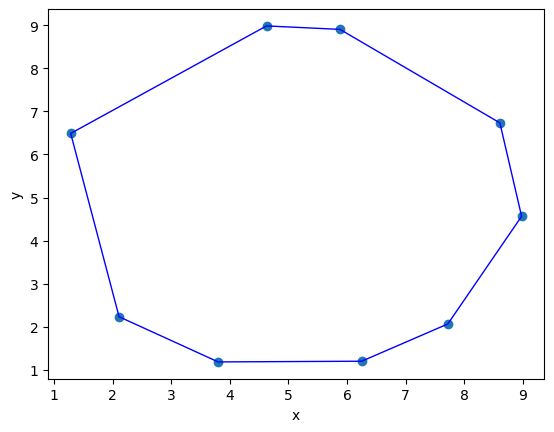

In [9]:
polygon_a = [(4.625987974558356, 8.982475989233963),
             (1.2867518592802791, 6.487208205141949),
             (2.111770314649602, 2.2326674784802716),  
             (3.80143101410267, 1.1837934560554713), 
             (6.249114081745743, 1.200037630346257), 
             (7.717759887423913, 2.0650756067132563), 
             (8.976116164356764, 4.5635366595682285), 
             (8.605388312321903, 6.732390001521777),
             (5.879521118050276, 8.90210745660644), 
              ]
draw_polygon(polygon_a)

b) Figura z testów od Koła naukowego Bit

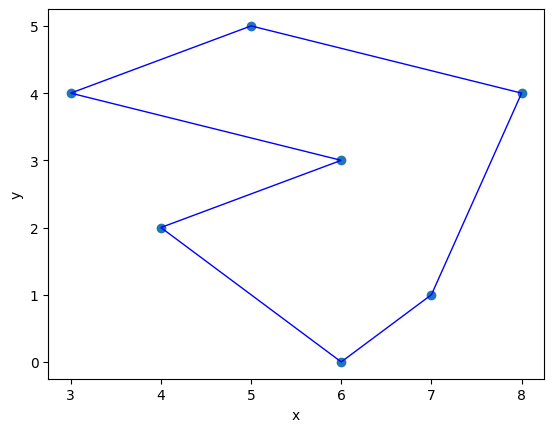

In [10]:
polygon_b=polygon_example_1
draw_polygon(polygon_example_1)


c) figura nie y-monotoniczny

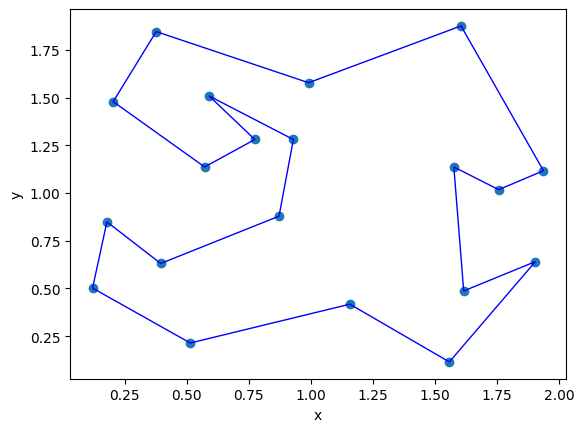

In [11]:
polygon_c = [(0.9906900397208263, 1.577802258331038), 
             (0.3772100191712505, 1.8454971082346459), 
             (0.20399213101607624, 1.478656017625998), 
             (0.5720801433458217, 1.1366014871936103), 
             (0.7741676795268584, 1.2803635362159183), 
             (0.5901236733619857, 1.50839988983751), 
             (0.9293420376658688, 1.2803635362159183), 
             (0.8716027416141441, 0.8788212613605064), 
             (0.3952535491874145, 0.6309556595979067), 
             (0.17873118899344667, 0.8490773891489944), 
             (0.12099189294172188, 0.5020655466813548), 
             (0.5143408472940969, 0.2145414486367391), 
             (1.156690515869535, 0.41779124208207086), 
             (1.5572568822283757, 0.11539520793169919), 
             (1.9036926585387246, 0.6408702836684107), 
             (1.6149961782801006, 0.48719361057559885), 
             (1.5753004122445398, 1.1366014871936103), 
             (1.7557357124061796, 1.0176259983475624), 
             (1.9361710125678198, 1.1167722390526023), 
             (1.604170060270402, 1.8752409804461576)]

draw_polygon(polygon_c)

d) pół choinki

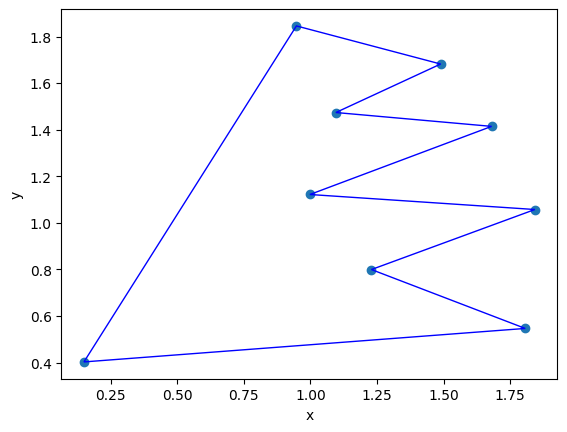

In [12]:
polygon_d = [(0.9473855676820329, 1.8454971082346459),
            (0.14986154096758428, 0.40291930597631487),
            (1.8062575964514387, 0.5466813549986228), 
            (1.228864635934191, 0.7995042687964746), 
            (1.8423446564837669, 1.0572844946295783), 
            (0.9979074517272919, 1.1217295510878542), 
            (1.6799528863382909, 1.414210961167722), 
            (1.0953425138145776, 1.473698705590746), 
            (1.4886914681669525, 1.6819058110713299)]

draw_polygon(polygon_d)

e) odwrócone pół choinki z punktem na dole

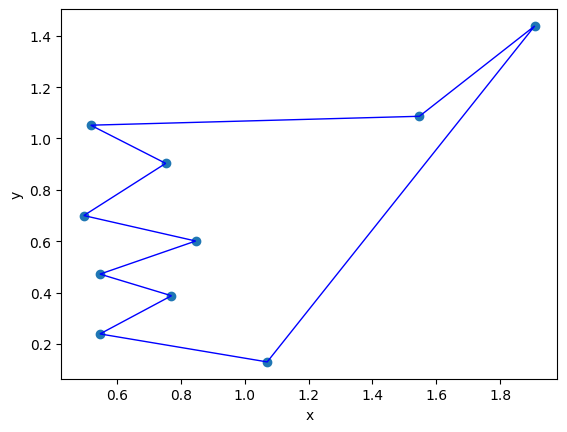

In [13]:
polygon_e = [(1.0706579623341312, 0.12971633158909435), (1.9078777550841406, 1.4384467088956212), (1.5470071547608608, 1.0864775543927294), (0.5185259438395131, 1.0517763701459655), (0.7530918340496449, 0.9030570090884056), (0.4968737078201162, 0.6998072156430739), (0.8469181901336977, 0.6006609749380338), (0.5473955918653755, 0.471770862021482), (0.771135364065809, 0.387496557422198), (0.5473955918653755, 0.23877719636463812)]
draw_polygon(polygon_e)

łuk z dwoma punktami po drugiej stronie

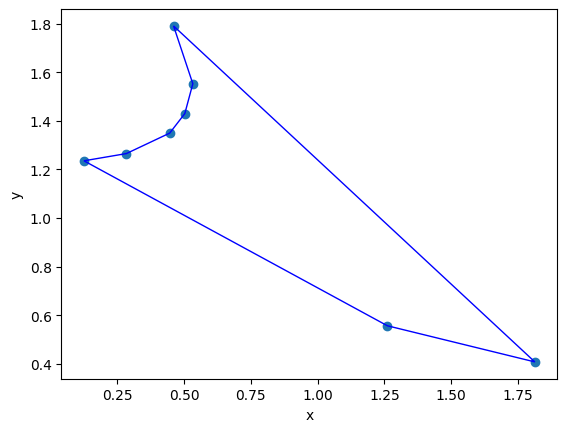

In [14]:
polygon_f = [(0.46021025724560494, 1.7909666758468739), 
             (0.5323843773102609, 1.553015698154778),
             (0.5023843773102609, 1.43015698154778),
             (0.44577543323267377, 1.3497659047094461),
             (0.28338366308719787, 1.2654916001101622),
             (0.1246005989449547, 1.2357477278986502),
             (1.2613429899632862, 0.5565959790691268),
             (1.8134750084579043, 0.40787661801156694)]
draw_polygon(polygon_f)

harmonijka

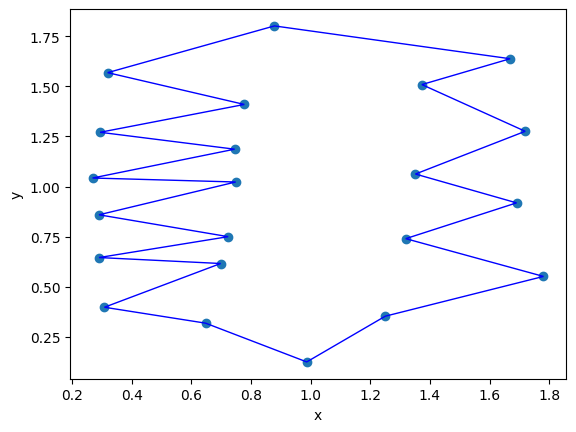

In [15]:
polygon_g = [(0.8788201536206095, 1.8008812999173778), 
              (0.31947072311952573, 1.567887634260534), 
              (0.7777763855300912, 1.40925364913247), 
              (0.2942097810968962, 1.270448912145414), 
              (0.745298031500996, 1.1861746075461304), 
              (0.2689488390742666, 1.0424125585238224),
              (0.7489067375042289, 1.0225833103828144), 
              (0.2906010750936634, 0.8589920132194986), 
              (0.7236457954815992, 0.7499311484439546), 
              (0.2906010750936634, 0.6458275957036627), 
              (0.6983848534589696, 0.6160837234921507), 
              (0.3086446051098274, 0.3979619939410629), 
              (0.6478629694137105, 0.318645001377031), 
              (0.9870813337175937, 0.12530983200220316), 
              (1.250516871953588, 0.35334618562379494), 
              (1.7809966544288092, 0.5516386670338748), 
              (1.319082286015011, 0.7400165243734507), 
              (1.6907790043479893, 0.9184797576425225), 
              (1.3515606400441063, 1.0622418066648305), 
              (1.7196486523738517, 1.2754062241806663), 
              (1.373212876063503, 1.50839988983751), 
              (1.6691267683285924, 1.637290002754062)]
draw_polygon(polygon_g)

Tworzę listę z badanych figur

In [16]:
polygon_list= [polygon_a,polygon_b,polygon_c,polygon_d,polygon_e,polygon_f,polygon_g]

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

Funkcje pomocnicze

In [17]:

def find_y_min(points):
    return points.index(min(points, key=lambda x: x[1]))


def find_y_max(points):
    return points.index(max(points, key=lambda x: x[1]))



Funkcja określająca, czy dany wielokąt jest y-monotoniczy

In [18]:
def is_y_monotonic(polygon):
    if len(polygon)<2:
        print("nieprawidłowy poligon")
        return
    n=len(polygon)
    upper_point_index = find_y_max(polygon)
    lower_point_index = find_y_min(polygon)

    # left chain
    cur_index = upper_point_index
    while cur_index!= lower_point_index:
        y_of_curr_point = polygon[cur_index][1]
        y_of_next_point = polygon[(cur_index+1)%n][1]
        if y_of_curr_point < y_of_next_point:
            return False
        cur_index=(cur_index+1)%n

    # right chain
    cur_index = lower_point_index
    while cur_index!= lower_point_index:
        y_of_curr_point = polygon[cur_index][1]
        y_of_next_point = polygon[(cur_index+1)%n][1]
        if y_of_curr_point > y_of_next_point:
            return False
        cur_index=(cur_index+1)%n
    return True

Przeprowadź test poprawności powyższej funkcji.

In [19]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.001s


Sprawdź monotoniczność swoich wielokątów

In [22]:
char='A'
for i in range(len(polygon_list)):
    print("Figura "+char+": ",end="")
    print(is_y_monotonic(polygon_list[i]))
    char= chr(ord(char)+1)


Figura A: True
Figura B: True
Figura C: False
Figura D: True
Figura E: True
Figura F: True
Figura G: True


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których zaczyna się monotoniczny spadek
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji.
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny.
- prawidłowy, pozostałe przypadki, jeden sąsiad powyżej, drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

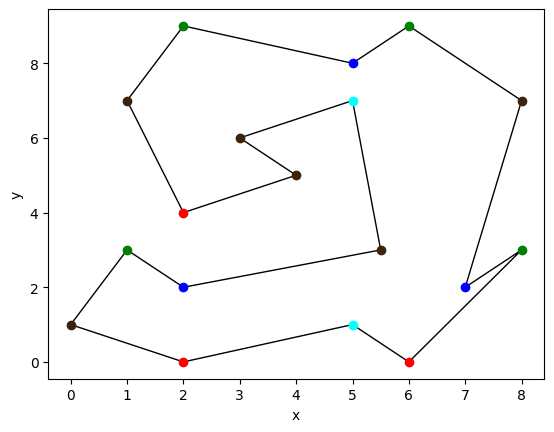

In [26]:
draw_polygon_colors(polygon_example_2,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [25]:
def orient(a,b,c):
    """
    Funkcja sprawdza, czy punkty a,b,c tworzą lewo- czy prawostronny skręt, obliczając wyznacznik odpowiedniej macierzy
    :param a: krotka współrzędnych (x, y) pierwszego punktu
    :param b: krotka współrzędnych (x, y) punktu, dla którego badamy rodzaj skrętu
    :param c: krotka współrzędnych (x, y) ostatniego punktu w układzie
    :return: wartość odpowiedniego wyznacznika macierzy, dodatnia jeżeli skręt jest lewostronny,
    ujemna jeżeli skręt jest prawostronny, w przeciwnym razie równa zero (punkty współliniowe)
    """
    # wyznacznik 3x3
    return a[0]*c[1]+a[1]*b[0]+c[0]*b[1]-c[1]*b[0]-a[0]*b[1]-a[1]*c[0]

In [ ]:
eps = 10**(-24)
def color_vertex(polygon):
    """
    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    n=len(polygon)
    T=[None for _ in range(n)]
    for i in range(n):
        y_i = polygon[i][1]
        y_prev_i = polygon[i-1][1]
        y_next_i = polygon[(i+1)%n][1]
        
        # obaj sąsiedzi nad punktem
        if y_i > y_prev_i and y_i > y_next_i:
            #sprawdzam kąt za pomocą wyznacznika
            if orient(polygon[i-1],polygon[i],polygon[(i+1)%n]) < -eps: #jest na lewo
                T[i] = 0
            else:
                T[i] = 3

        # obaj sąsiedzi pod punktem
        elif y_i < y_prev_i and y_i < y_next_i:
            #sprawdzam kąt za pomocą wyznacznika
            if orient(polygon[i-1],polygon[i],polygon[(i+1)%n]) < -eps: #jest na lewo
                T[i] = 1
            else:
                T[i] = 2
        else:
            T[i] = 4
    return T
        

Przeprowadź test poprawności powyższej funkcji. 

In [29]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.003s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

Poniższe rysunki odpowiadają kolejnym wielokątom w tablicy, czyli kolejno
wielokąt a), b), c), d), e), f), g)

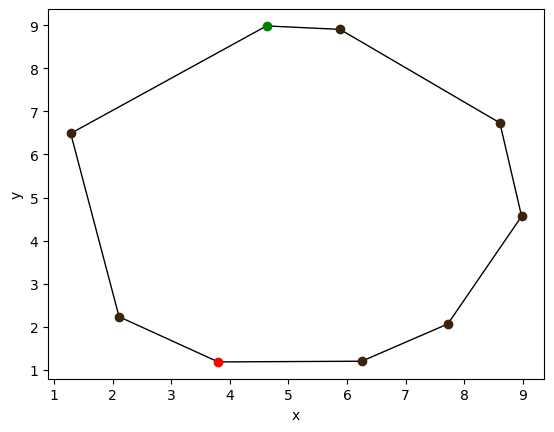

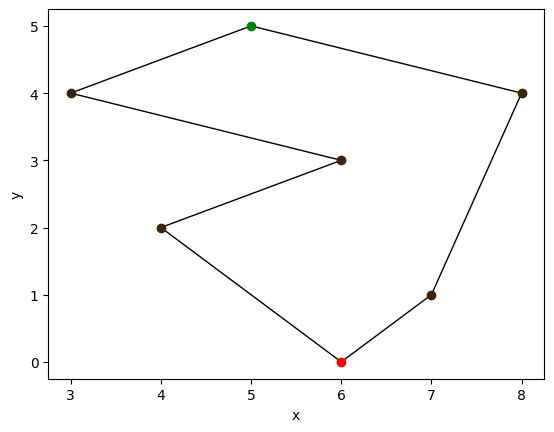

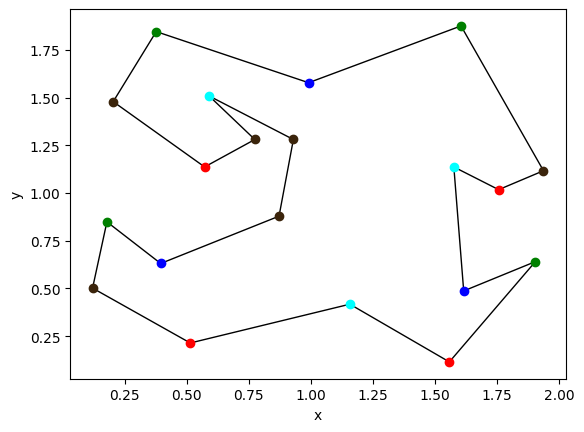

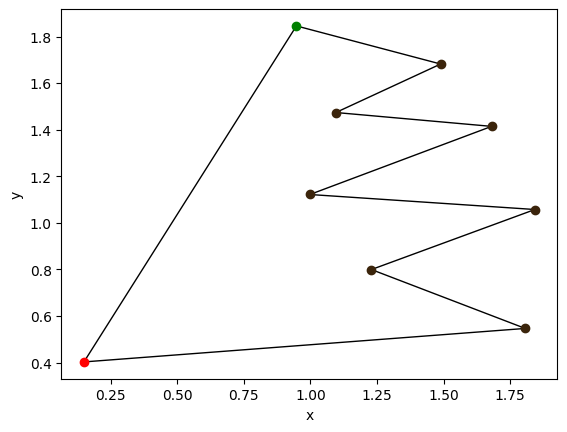

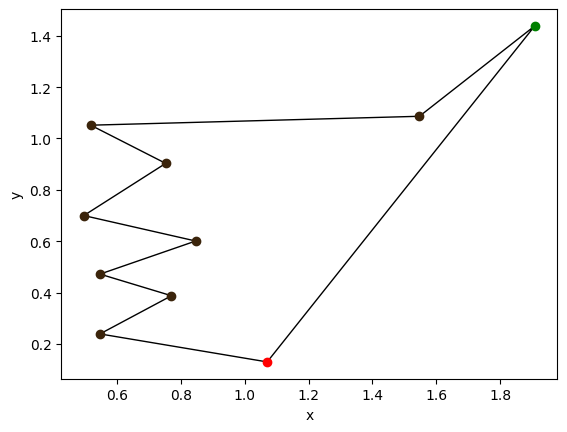

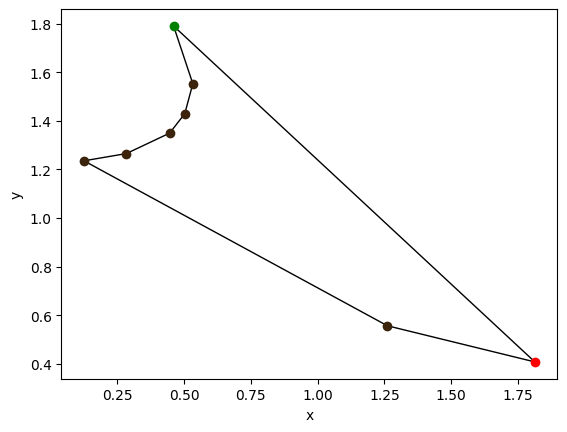

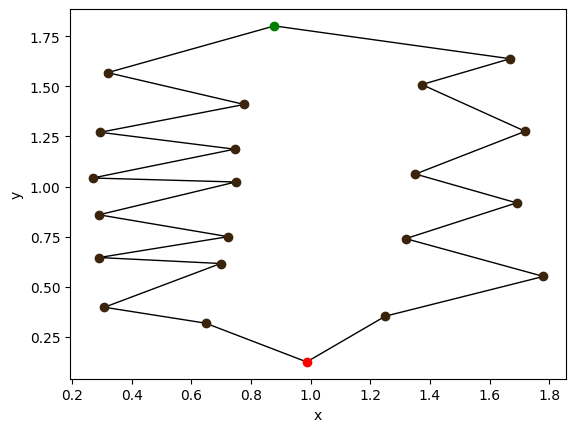

In [66]:
for polygon in polygon_list:
    colors = color_vertex(polygon)
    draw_polygon_colors(polygon,colors)

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

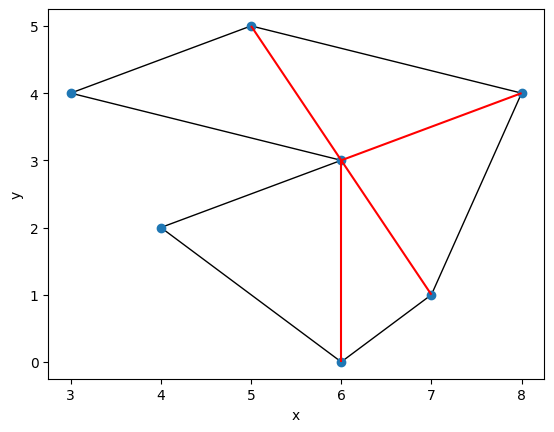

In [31]:
draw_polygon_tri(polygon_example_1, polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

Funkcje pomocnicze

In [ ]:
eps = 10**(-24)
def find_chains(polygon):
    # Funkcja dzieli zbiór punktów na łańcuch lewy i prawy. Zwracane są 
    # zbiory które są posortowane względem y malejąco

    n=len(polygon)
    left_chain=[]
    right_chain=[]
    i_min = find_y_min(polygon)
    i_max = find_y_max(polygon)
    i=i_max
    while i!=i_min:
        left_chain.append((polygon[i],i))
        i = (i+1)%n
    
    while i!=i_max:
        right_chain.append((polygon[i],i))
        i = (i+1)%n
    
    return left_chain, right_chain[::-1]

def sort_point_by_y_cord_and_add_membership_of_chain(left_chain,right_chain,n):
    # z dwóch posortowanych list po y tworzę jedną (są posortowane po y z definicji y-monotoniczności)
    y_sorted_order=[None for _ in range(n)]
    l=len(left_chain)
    r=len(right_chain)
    i=j=0
    # porówuje punkty obu list, dopuki nie wyczerpie jednej z nich
    while i<l and j<r:
        left_point_position, left_point_index = left_chain[i]
        right_point_position, right_point_index = right_chain[j]

        if left_point_position[1] > right_point_position[1]:
            y_sorted_order[i+j]=(left_point_position,left_point_index,'left chain')
            i+=1
        else:
            y_sorted_order[i+j]=(right_point_position, right_point_index,'right chain')
            j+=1

    #kończę lewy
    while i<l:
        left_point_position, left_point_index = left_chain[i]
        y_sorted_order[i+j]=(left_point_position, left_point_index,'left chain')
        i+=1

    # kończę prawy
    while j<r:
        right_point_position, right_point_index = right_chain[j]
        y_sorted_order[i+j]=(right_point_position, right_point_index,'right chain')
        j+=1    
    return y_sorted_order

def are_points_neighbor(index_of_point1, index_of_point2, n):
    return abs(index_of_point1 - index_of_point2) == 1 or abs(index_of_point1 - index_of_point2) == n-1



def correct_triangle(stack_point_one,stack_point_two,current_point,n):
    
    # sprawdzam, czy nie sąsiadują ze sobą
    if are_points_neighbor(current_point[1],stack_point_one[1],n): return False

    # sprawdzam, czy tworzą układ odpowiedni układ (prawo skrętny/ lewo skrętny) 
    # zależny od przynależności badanego boku do łańcucha
    if current_point[2]=='right chain':
        return orient(current_point[0],stack_point_two[0],stack_point_one[0])<-eps
    
    else:
        return orient(current_point[0],stack_point_two[0],stack_point_one[0])>eps

Funkcja do triangulacji

In [24]:
def triangulation(polygon):
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki o indeksach 1 i 5 oraz 2 i 3
    """
    if not is_y_monotonic(polygon):
        print("wielokąt nie jest y-monotoniczny")
        return []
    n = len(polygon)
    left_chain, right_chain = find_chains(polygon)
    y_sorted_order = sort_point_by_y_cord_and_add_membership_of_chain(left_chain,right_chain,n)
    # wrzucam dwa pierwsze punkty na stos z posortowanej listy po y
    stack=[y_sorted_order[0],y_sorted_order[1]]
    diagonals=[]

    for i in range(2,n):
        current_point = y_sorted_order[i]
        _, current_index, current_sign = current_point
        # jeżeli znak aktualnie rozpatrywanego wierzchołka jest inny niż pierwszego ze stosu
        if current_sign!=stack[-1][2]:
            # rozpatruję przekątną z każdym punktem ze stosu
            for j in range(len(stack)-1,-1,-1):
                _, point_from_stack_position, _ = stack[j]
                # sprawdzam, czy nie są to sąsiednie wierzchołki
                if not are_points_neighbor(current_index, point_from_stack_position,n): 
                    # dodaje przekątną do triangulacji
                    diagonals.append((current_index,stack[j][1]))
            # redukuje stos do jednego elemntu, którym był element na wierzchu, drugi element dodam na koniec
            stack=[stack[-1]]
        # jeżeli znaki są torzsame
        else:
            last_index_of_stack=len(stack)-1
            # dla każdego trójkąta utworzonego z dwóch punktów na stosie i current_point sprawdzam czy się nadaje
            for j in range(len(stack)-2, -1, -1):
                if correct_triangle(stack[j], stack[last_index_of_stack], current_point,n): # jeżeli się nadaje
                    # dodaje przekątną
                    diagonals.append((current_index,stack[j][1]))
                    # opróżniam stos z punktów nieprzydatnych. 
                    for _ in range(len(stack)-1,last_index_of_stack-1,-1):
                        stack.pop()
                    
                    last_index_of_stack=j

        # dodaje ostatni punkt do stosu
        stack.append(current_point)
    # dorobić funkcje 
    return diagonals

In [27]:
def create_full_triangulation_form(polygon):
    # funkcja zwraca tablicę krawędzi wielokąta po striangulowaniu 
    diagonals = triangulation(polygon)
    n = len(polygon)
    edges = []
    # dodaje wszystkie krawędzie boków
    for i in range(n-1):
        edges.append((polygon[i],polygon[i+1]))
    #łącze piewrszy z ostatnim
    edges.append((polygon[-1],polygon[0]))
    # dodaje przekątne
    for x,y in diagonals:
        edges.append((polygon[x],polygon[y]))

    return edges

Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: lista indeksów punktów, które należy połączyć przekątnymi, aby otrzymać triangulacje danego wielokąta

Przeprowadź testy poprawności powyższej funkcji.


In [34]:
Test().runtest(3, triangulation)

Lab 3, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.003s


# Wizualizacja tworzenia triangulacji wybranych figur

Figura A

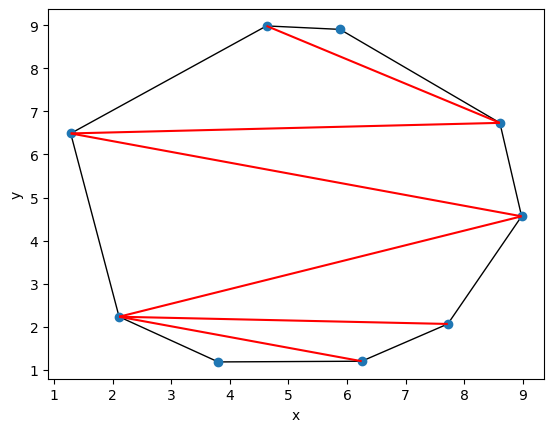

In [28]:
polygon = polygon_a
tri = triangulation(polygon)
if is_y_monotonic(polygon):
    draw_polygon_tri(polygon, [(polygon[x], polygon[y]) for (x, y) in tri])

Figura B

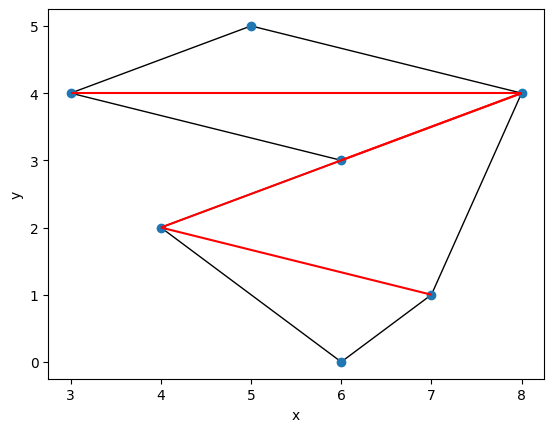

In [36]:
polygon = polygon_b
tri = triangulation(polygon)
if is_y_monotonic(polygon):
    draw_polygon_tri(polygon, [(polygon[x], polygon[y]) for (x, y) in tri])

Figura C

In [38]:
polygon = polygon_c
tri = triangulation(polygon)
if is_y_monotonic(polygon):
    draw_polygon_tri(polygon, [(polygon[x], polygon[y]) for (x, y) in tri])

wielokąt nie jest y-monotoniczny


Figura D

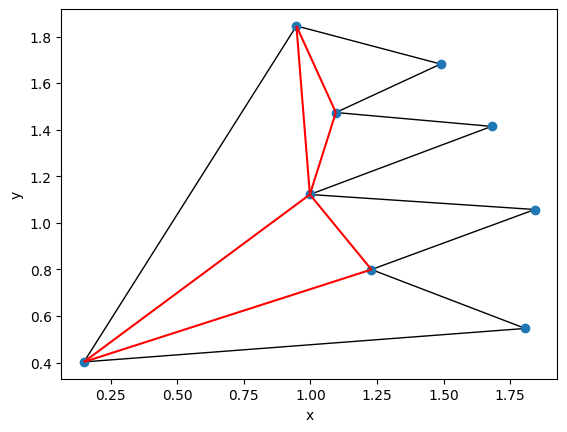

In [42]:
polygon = polygon_d
tri = triangulation(polygon)
if is_y_monotonic(polygon):
    draw_polygon_tri(polygon, [(polygon[x], polygon[y]) for (x, y) in tri])

Figura E

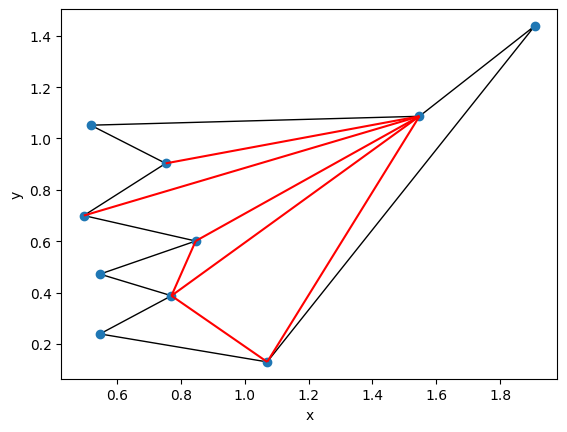

In [43]:
polygon = polygon_e
tri = triangulation(polygon)
if is_y_monotonic(polygon):
    draw_polygon_tri(polygon, [(polygon[x], polygon[y]) for (x, y) in tri])

Figura F

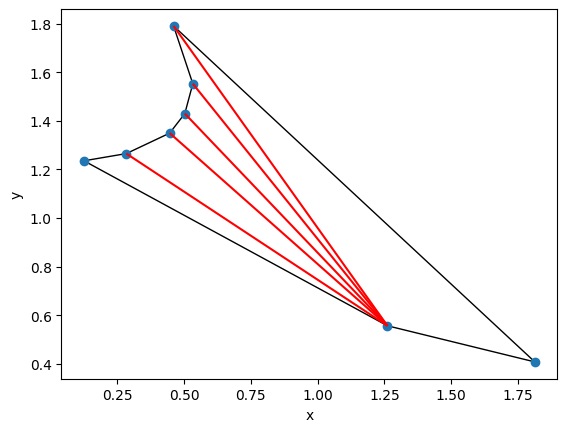

In [44]:
polygon = polygon_f
tri = triangulation(polygon)
if is_y_monotonic(polygon):
    draw_polygon_tri(polygon, [(polygon[x], polygon[y]) for (x, y) in tri])

Figura G

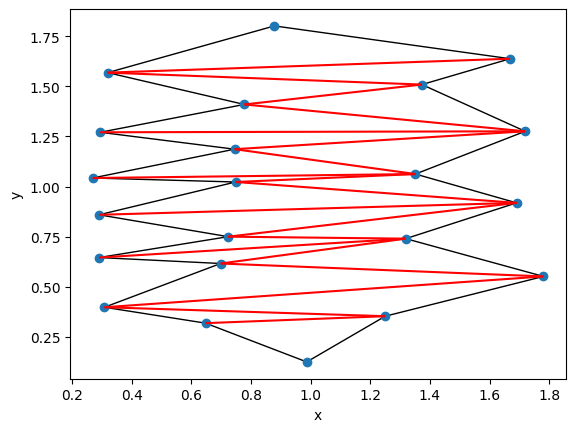

In [45]:
polygon = polygon_g
tri = triangulation(polygon)
if is_y_monotonic(polygon):
    draw_polygon_tri(polygon, [(polygon[x], polygon[y]) for (x, y) in tri])

# Wizualizacja krok po kroku tworzenia triangulacji wybranych figur

Funkcja do rysowania gifów

In [46]:
def triangulation_draw(polygon):
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki o indeksach 1 i 5 oraz 2 i 3
    """
    if not is_y_monotonic(polygon): 
        print("Wielkokąt nie jest y-monotoniczny")
        return
    n=len(polygon)
    left_chain,right_chain=find_chains(polygon)
    y_sorted_order=sort_point_by_y_cord_and_add_membership_of_chain(left_chain,right_chain,n)
 
    stack=[y_sorted_order[0],y_sorted_order[1]]
    diagonals=[]
    vis=Visualizer()
    vis.add_point(polygon,color="blue")
    vis.add_line_segment([(polygon[i],polygon[(i+1)%n]) for i in range(n)],color="black")
    vis.add_point([stack[0][0],stack[1][0]],color="red")
    for i in range(2,n):
        current_point = y_sorted_order[i]
        current_position, current_index, current_sign = current_point
        vis.add_point(current_position,color="red")
        if current_sign!=stack[-1][2]:
         
            for j in range(len(stack)-1,-1,-1):
                _, point_from_stack_position, _ = stack[j]
            
                if not are_points_neighbor(current_index, point_from_stack_position,n): 
                    vis.add_line_segment((current_position,polygon[stack[j][1]]),color="red")
                    diagonals.append((current_index,stack[j][1]))
                if j!=len(stack)-1: vis.add_point(stack[j][0],color="yellow")
            stack=[stack[-1]]
    
        else:
            last_index_of_stack=len(stack)-1
       
            for j in range(len(stack)-2, -1, -1):
                if correct_triangle(stack[j], stack[last_index_of_stack], current_point,n): 
              
                    diagonals.append((current_index,stack[j][1]))
                    vis.add_line_segment((current_position,polygon[stack[j][1]]),color="red")
                    for _ in range(len(stack)-1,last_index_of_stack-1,-1):
                        vis.add_point(stack[-1][0],color="yellow")
                        stack.pop()
                    
                    last_index_of_stack=j

       
        stack.append(current_point)
    while len(stack)>0:
        vis.add_point(stack[-1][0],color="yellow")
        stack.pop()
    return diagonals, vis

Figura A

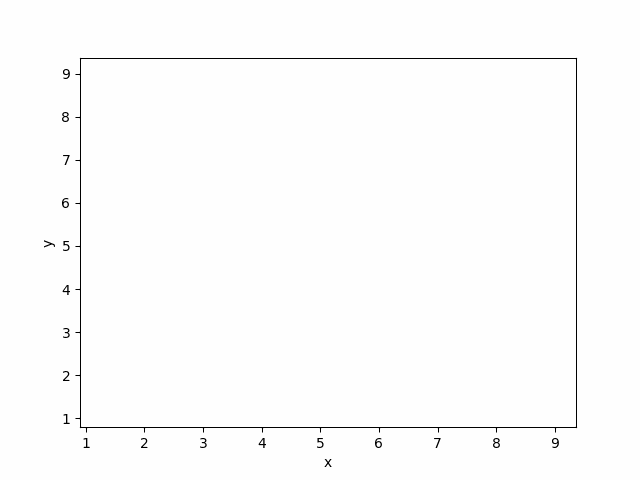

In [23]:
_,triang_vis=triangulation_draw(polygon_a)
triang_vis.show_gif(interval=400)

Figura B

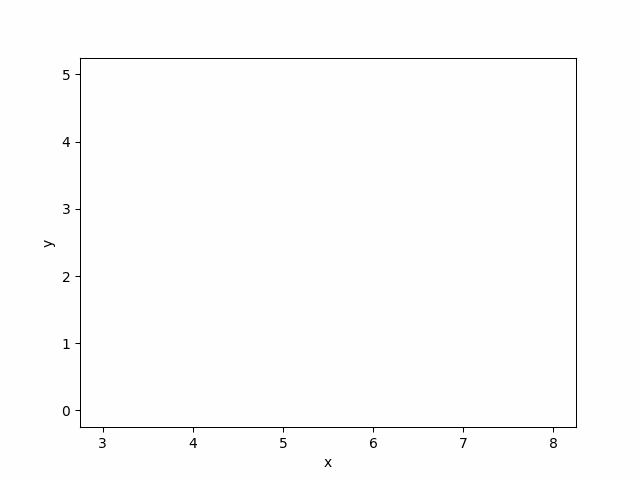

In [45]:
_,triang_vis=triangulation_draw(polygon_b)
triang_vis.show_gif(interval=400)

Figura D

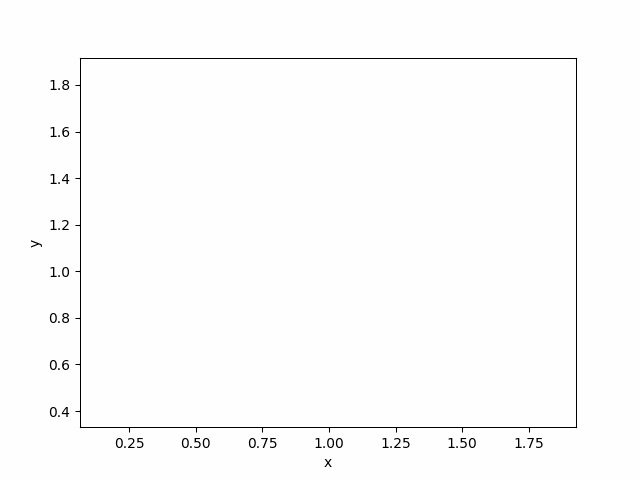

In [48]:
_,triang_vis=triangulation_draw(polygon_d)
triang_vis.show_gif(interval=400)

Figura E

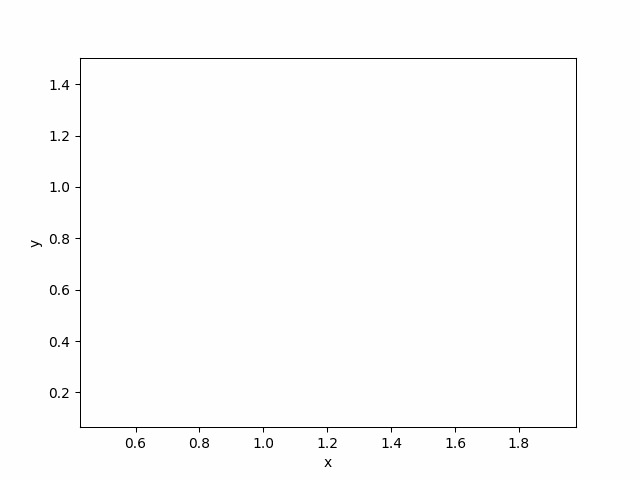

In [47]:
_,triang_vis=triangulation_draw(polygon_e)
triang_vis.show_gif(interval=400)

Figura F

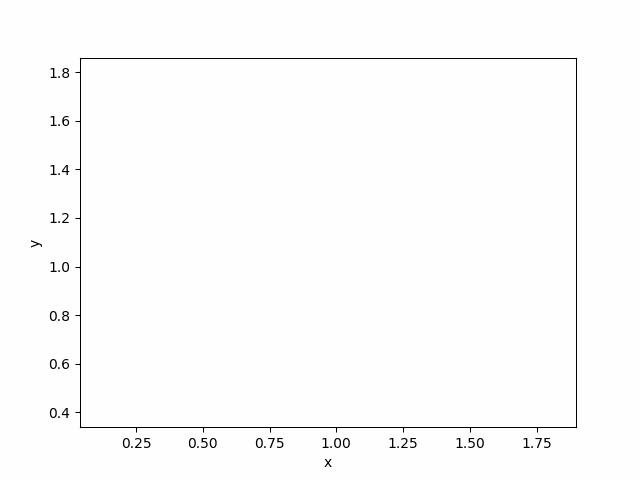

In [41]:
_,triang_vis=triangulation_draw(polygon_f)
triang_vis.show_gif(interval=400)

Figura G

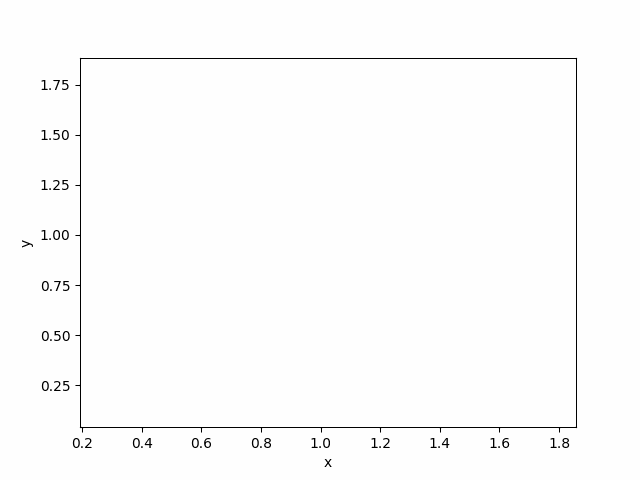

In [48]:
_,triang_vis=triangulation_draw(polygon_g)
triang_vis.show_gif(interval=400)